**Install Python libraries**

In [ ]:
#!pip3 install 'torch==1.4'
#!pip3 install 'torchvision==0.5.0'
#!pip3 install 'Pillow-SIMD'

**Import Libraries**

In [ ]:
import os
import numpy as np

from torchvision import transforms
from torch.utils.data import Subset
from torch.backends import cudnn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

**Set Arguments**

In [ ]:
DEVICE = 'cuda'
BATCH_SIZE = 128
LR = 2
MOMENTUM = 0.9         
WEIGHT_DECAY = 1e-4
EPOCHS = 70

MODE = 3            # 0 - Fine Tuning
                    # 1 - LwF
                    # 2 - iCaRL
                    # 3 - iCaRL2

# NB: LwF is iCaRL without exemplars while Fine Tuning is LwF without distillation loss (at implementation level)

####### iCaRL only #######
MEMORY = 2000        # Total number of exemplars
HERDING = True       # Wheter to perform herding or random selection for the exemplar set
CLASSIFIER = 'NME'   # Default 'NME', 'FC' for hybrid1, otherwise an sklearn classifier must be passed

####### iCaRL2 only #######
LR2 = .08      # Learning rate for stabilization phase
EPOCHS2 = 10   # Epochs for stabilization phase 
lambda_ = .2   # Hyper-parameter controlling the weight of the distillation
delta = .25    # Value added to lambda at each incremental step

# iCaRL2
# - Decreasing Weight Decay policy
# - Class_Loss on all samples + lambda * Distill_Loss
#   - The value of lambda increases at each incremental step
#   - The logits for distillation corresponding at the classes learned at 
#     time t are teached by the network at time t
#   - Logits for distillation are raised to 1/2 ( Temperature )
# - A stabilization phase with only Class_Loss on the exemplars is executed
#   after each incremental step



**Load Dataset**

In [ ]:
if not os.path.isdir('./IncrementalLearning'):
  !git clone https://github.com/NiccoloCavagnero/IncrementalLearning

DATA_DIR = './IncrementalLearning'
from IncrementalLearning.dataset import Cifar100

# Load the dataset with custom class
train_dataset = Cifar100(DATA_DIR, True, transform=transforms.ToTensor())
test_dataset = Cifar100(DATA_DIR, False, transform=transforms.ToTensor())

print(f'Train Dataset: {len(train_dataset)}')
print(f'Test Dataset: {len(test_dataset)}')

Files already downloaded and verified
Files already downloaded and verified
Train Dataset: 50000
Test Dataset: 10000


**Prepare Incremental Batches**

In [ ]:
train_batches, test_batches = [], []

for i in range(10):
  train_batch_indexes = train_dataset.__getBatchIndexes__(i)
  
  test_batch_indexes = []
  for j in range(i+1):
    test_indexes = test_dataset.__getBatchIndexes__(j)
    test_batch_indexes += test_indexes

  train_batch = Subset(train_dataset,train_batch_indexes)
  test_batch = Subset(test_dataset,test_batch_indexes)

  train_batches.append(train_batch)
  test_batches.append(test_batch)

**Run Model**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



##### BATCH 1 #####

 ### Update Representation ###
   # Epoch: 70/70, LR = 0.08,  Train loss = 0.00764

   # Elapsed time: 2.87

 ### Construct Random Exemplar Set ###
   # Exemplars per class: 200

   # Elapsed time: 2.88

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.907

   # Elapsed time: 2.89

 ### NME ###
   # Computing means 
   # NME Predicting 
   # NME Accuracy: 0.902

   # Elapsed time: 2.96


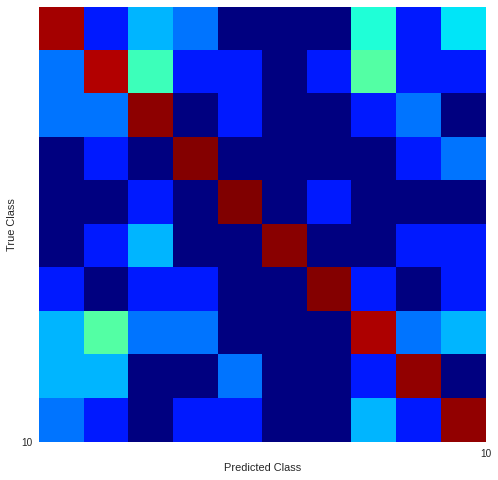


 ### Reduce Exemplar Set ###
   # Exemplars per class: 200

   # Elapsed time: 2.96

##### BATCH 2 #####

 ### Update Representation ###
   # Epoch: 70/70, LR = 0.08,  Train loss = 0.01034

   # Elapsed time: 7.12

 ### Construct Random Exemplar Set ###
   # Exemplars per class: 200

   # Elapsed time: 7.13

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.8335

   # Elapsed time: 7.14

 ### Stabilize Network ###
   # Epoch: 10/10, LR = 0.0032,  Train loss = 0.00494

   # Elapsed time: 7.45

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.8395

   # Elapsed time: 7.46

 ### NME ###
   # Computing means 
   # NME Predicting 
   # NME Accuracy: 0.8415

   # Elapsed time: 7.6


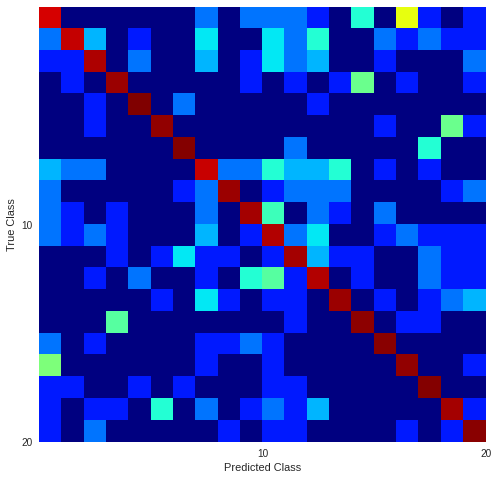


 ### Reduce Exemplar Set ###
   # Exemplars per class: 100

   # Elapsed time: 7.61

##### BATCH 3 #####

 ### Update Representation ###
   # Epoch: 70/70, LR = 0.08,  Train loss = 0.01248

   # Elapsed time: 12.23

 ### Construct Random Exemplar Set ###
   # Exemplars per class: 100

   # Elapsed time: 12.24

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.7826666666666666

   # Elapsed time: 12.26

 ### Stabilize Network ###
   # Epoch: 10/10, LR = 0.0032,  Train loss = 0.00467

   # Elapsed time: 12.49

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.795

   # Elapsed time: 12.5

 ### NME ###
   # Computing means 
   # NME Predicting 
   # NME Accuracy: 0.7953333333333333

   # Elapsed time: 12.74


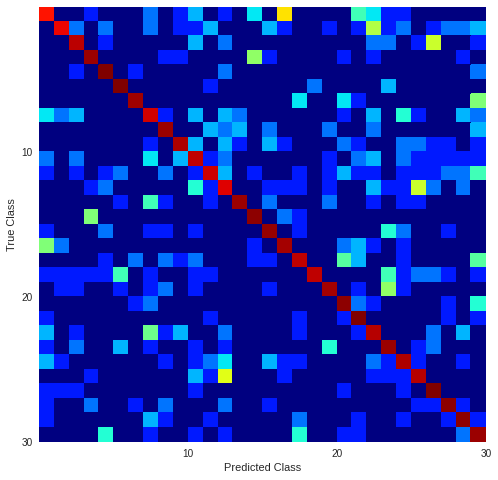


 ### Reduce Exemplar Set ###
   # Exemplars per class: 66

   # Elapsed time: 12.75

##### BATCH 4 #####

 ### Update Representation ###
   # Epoch: 70/70, LR = 0.08,  Train loss = 0.01541

   # Elapsed time: 17.83

 ### Construct Random Exemplar Set ###
   # Exemplars per class: 66

   # Elapsed time: 17.84

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.69275

   # Elapsed time: 17.85

 ### Stabilize Network ###
   # Epoch: 10/10, LR = 0.0032,  Train loss = 0.00537

   # Elapsed time: 18.06

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.713

   # Elapsed time: 18.08

 ### NME ###
   # Computing means 
   # NME Predicting 
   # NME Accuracy: 0.7195

   # Elapsed time: 18.44


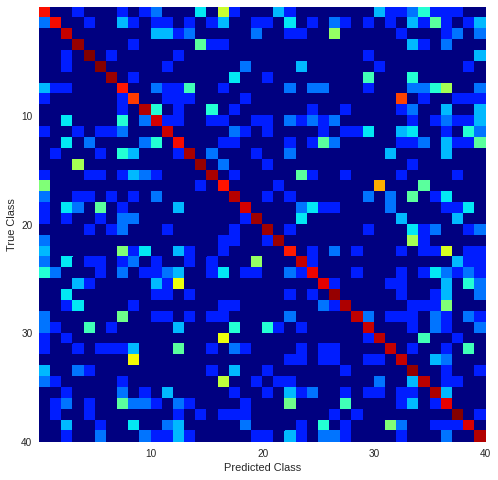


 ### Reduce Exemplar Set ###
   # Exemplars per class: 50

   # Elapsed time: 18.45

##### BATCH 5 #####

 ### Update Representation ###
   # Epoch: 70/70, LR = 0.08,  Train loss = 0.01622

   # Elapsed time: 23.99

 ### Construct Random Exemplar Set ###
   # Exemplars per class: 50

   # Elapsed time: 24.0

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.6794

   # Elapsed time: 24.02

 ### Stabilize Network ###
   # Epoch: 10/10, LR = 0.0032,  Train loss = 0.00506

   # Elapsed time: 24.22

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.6942

   # Elapsed time: 24.24

 ### NME ###
   # Computing means 
   # NME Predicting 
   # NME Accuracy: 0.694

   # Elapsed time: 24.74


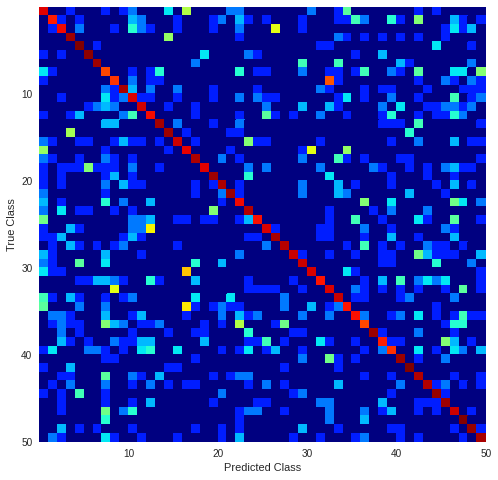


 ### Reduce Exemplar Set ###
   # Exemplars per class: 40

   # Elapsed time: 24.75

##### BATCH 6 #####

 ### Update Representation ###
   # Epoch: 70/70, LR = 0.08,  Train loss = 0.01793

   # Elapsed time: 30.75

 ### Construct Random Exemplar Set ###
   # Exemplars per class: 40

   # Elapsed time: 30.76

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.617

   # Elapsed time: 30.78

 ### Stabilize Network ###
   # Epoch: 10/10, LR = 0.0032,  Train loss = 0.00519

   # Elapsed time: 30.97

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.6396666666666667

   # Elapsed time: 30.99

 ### NME ###
   # Computing means 
   # NME Predicting 
   # NME Accuracy: 0.6446666666666667

   # Elapsed time: 31.68


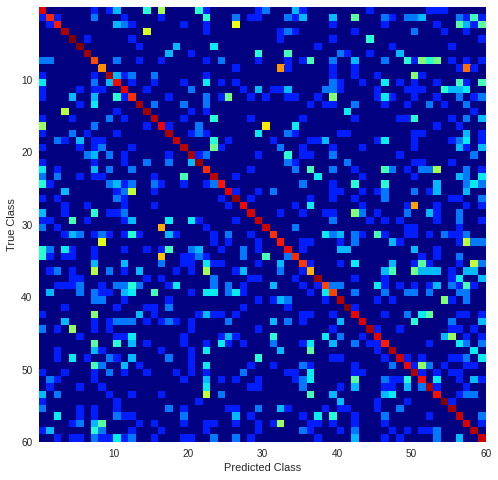


 ### Reduce Exemplar Set ###
   # Exemplars per class: 33

   # Elapsed time: 31.69

##### BATCH 7 #####

 ### Update Representation ###
   # Epoch: 70/70, LR = 0.08,  Train loss = 0.01947

   # Elapsed time: 38.13

 ### Construct Random Exemplar Set ###
   # Exemplars per class: 33

   # Elapsed time: 38.14

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.5522857142857143

   # Elapsed time: 38.16

 ### Stabilize Network ###
   # Epoch: 10/10, LR = 0.0032,  Train loss = 0.00562

   # Elapsed time: 38.35

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.5791428571428572

   # Elapsed time: 38.37

 ### NME ###
   # Computing means 
   # NME Predicting 
   # NME Accuracy: 0.5917142857142857

   # Elapsed time: 39.25


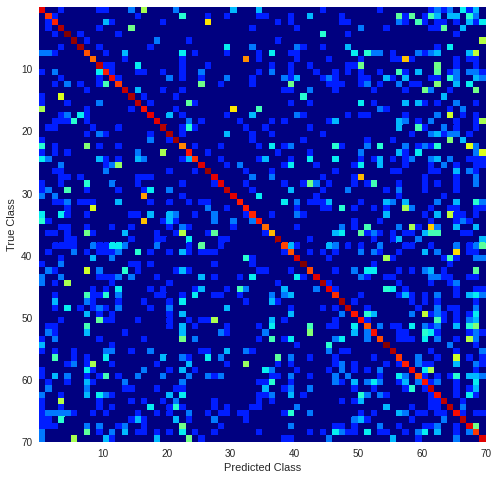


 ### Reduce Exemplar Set ###
   # Exemplars per class: 28

   # Elapsed time: 39.26

##### BATCH 8 #####

 ### Update Representation ###
   # Epoch: 25/70, LR = 2,  Train loss = 0.02602

In [ ]:
params = {
    'EPOCHS': EPOCHS,
    'BATCH_SIZE': BATCH_SIZE,
    'LR': LR,
    'MOMENTUM': MOMENTUM,
    'WEIGHT_DECAY': WEIGHT_DECAY,
    'LR2': LR2,          # 0.08
    'EPOCHS2': EPOCHS2,  # 10 
    'lambda': lambda_,   # 0.2
    'delta': delta       # 0.25
    }

cudnn.benchmark

from matplotlib import pyplot as plt
plt.style.use('seaborn')

from IncrementalLearning.resnet_cifar import resnet32
net = resnet32(num_classes=10)

from IncrementalLearning.iCaRL import iCaRL
model = iCaRL(memory=MEMORY,device=DEVICE,params=params,plot=True)

from IncrementalLearning.iCaRL2 import iCaRL2
model2 = iCaRL2(memory=MEMORY,device=DEVICE,params=params,plot=True)

if MODE == 0:
  accuracies = model.runLwF(train_batches,test_batches,net,fineTune=True)
elif MODE == 1:
  accuracies = model.runLwF(train_batches,test_batches,net)
elif MODE == 2:
  accuracies = model.run(train_batches,test_batches,net,HERDING,CLASSIFIER)
elif MODE == 3:
  accuracies = model2.run(train_batches,test_batches,net)

**Results**

In [ ]:
import numpy as np 
print("### Accuracies per batch: ###")
print([round(accuracy,3) for accuracy in accuracies])
print("\n### Average accuracy: ###")
print(np.mean(accuracies))